# Intro to cheminformatics with RDkit


<div class="alert alert-block alert-info">
<h2>Objectives:</h2>

* Import packages/libraries

* SMILES strings

* RDKit library

* Run functions
    * `Chem.MolFromSmiles()`
    * `Chem.Draw.MolToImage()`
    * `Descriptors.ExactMolWt()`
    


</div>

There are Python libraries that are made for working just with chemical data. One commonly used library in Python for data science (or cheminformatics) is called [RDKit](https://en.wikipedia.org/wiki/RDKit).

RDKit provides a molecule object that allows you to manipulate chemical structures. It has capabilities for reading and writing molecular file formats, calculating molecular properties, and performing substructure searches. In addition, it offers a wide range of cheminformatics algorithms such as molecular fingerprint generation, similarity metrics calculation, and molecular descriptor computation. This notebook will only introduce a few RDKit basics and a common molecular format called SMILES. 

## Simplified Molecular-Input Line-entry System: SMILES 

SMILES stands for "Simplified Molecular-Input Line-Entry System" and is a way to represent molecules as a string of characters. SMILES is basically the cheminformatics version of the condensed formula we learned in gen chem.

You can read more about the SMILES syntax at [this tutorial](https://chemicbook.com/2021/02/13/smiles-strings-explained-for-beginners-part-1.html)

### SMILES examples

| Name              | SMILES      | Rule concepts                                 | Structure                                          |
| ----------------- | ----------- | --------------------------------------------- | -------------------------------------------------- |
| Ethanol           | CCO         | Atoms: `C` carbon, `O` oxygen<br>             | ![ethanol](images/ethanol.png)                     |
| Propargyl bromide | C#CCBr      | Atoms: `Br` bromine<br>Bonds: `#` triple      | ![Propargyl_bromide](images/propargyl_bromide.png) |
| 2-Propanone       | CC(=O)C     | Bonds: `=` double<br>Branches: `()`           | ![isopropanone](images/isopropanone.png)           |
| Phenol            | c1(O)ccccc1 | Aromatics: `c` lower case<br>Rings: `1.....1` | ![phenol](images/phenol.png)                       |


### Look up SMILES:

Most of the time, you will not need to write a SMILES string by hand.
You will be able to look up a molecule's SMILES string from a web database like:
* [PubChem](https://pubchem.ncbi.nlm.nih.gov/compound/Eugenol#section=SMILES) - names and identifiers section

    ![pubchem_eugenol](images/pubchem_eugenol.png)
    
* [Wikipedia](https://en.wikipedia.org/wiki/Cinnamaldehyde) - chemical identifiers panel

    ![wiki_eugenol](images/wikipedia_eugenol.png)

### SMILES from a drawing

You can use tools like this [molecule sketcher from the Protein Data Bank](https://www.rcsb.org/chemical-sketch)
to draw molecules and get their SMILES strings.

You can [paste a SMILES structure into ChemDraw](https://people.stfx.ca/blynch/CS%20ChemOffice%202004/CS%20ChemDraw/CS%20ChemDraw%20Help/CD8ch11a5.html) to visualize a structure.

![chemdraw_eugenol](images/chemdraw_eugenol.png)

<div class="alert alert-block alert-warning">
<h3>Exercise</h3>

<p> Use online resources to look up the SMILES string for the following structures:
<p>
    <ul>
        <li> What is the SMILES for ethyl acetate?</li>
        <li> What is the SMILES for vanillin?</li>
        <li> What is the SMILES for amoxicillin?</li>
    </ul>
</p>

</div>

In [40]:
# Fill in your answers here as strings (remember to use quotation marks):
ethyl_acetate_smiles = 'O=C(OCC)C'
vanillin_smiles = 'c1(C=O)cc(OC)c(O)cc1'
amoxicillin_smiles = 'O=C(O)[C@@H]2N3C(=O)[C@@H](NC(=O)[C@@H](c1ccc(O)cc1)N)[C@H]3SC2(C)C'

## Importing Packages
In Python, we use **packages** (or libraries) to add extra functionality to our programs without having to reinvent the wheel ourselves. For example, RDKit is a library of tools specifically designed for cheminformatics.

To import a package, we use the `import` statement. Below, we'll import `rdkit` and the `rdkit.Chem.rdMolDescriptors` module for calculating molecular properties.


In [ ]:
import rdkit
from rdkit.Chem import rdMolDescriptors

## Creating Molecules with RDKit

Throughout this tutorial, it will be helpful to have access to the [RDKit documentation](https://www.rdkit.org/docs/index.html). 

To get information about molecules in RDKit, we have to first create objects representing molecules. We will use SMILES strings to load our structures into RDkit, although RDKit accepts many other file formats.

### Creating molecules using SMILES

We can create a representation of ibuprofen using RDKit by using the `MolFromSmiles` function in `rdkit.Chem`.

In [21]:
ibuprofen_smiles = 'CC(Cc1ccc(cc1)C(C(=O)O)C)C'
ibuprofen = rdkit.Chem.MolFromSmiles(ibuprofen_smiles)

Let's explore the output of the `Chem.MolFromSmiles()` function using the `print()` and `type()` functions.

In [22]:
print(ibuprofen)
type(ibuprofen)

rdkit.Chem.rdchem.Mol

The `print()` function doesn't known how to represent this object. Instead it informed us that the variable `ibuprofen` is an RDkit `mol` object..

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Python Objects</strong>

Most of this functionality is achieved through the RDKit `mol` object. In Python, we use the word "object" to refer to a variable type with associated data and methods. 
One example of an object we have seen in notebooks is a list - we could also call it a "list object". An object has `attributes` (data) and `methods`. 
You access information about objects with the syntax
```python
object.data
```
where data is the attribute name.

You acceess object methods with the syntax
```python
object.method(arguments)
```

For example, for a list "`append` is a method that was covered in the introductory lesson.

```
my_list = []
my_list.append(1) # "append" is a method
```
</div>   

To interact with our `ibuprofen` molecule object we need to use Rdkit methods associates with an `RDkit.mol` object.

We can draw the molecule using the `Chem.Draw.MolToImage()` method.

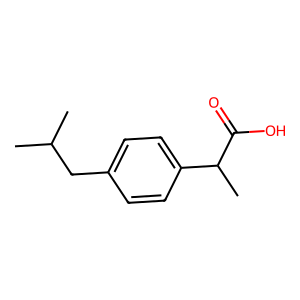

In [23]:
rdkit.Chem.Draw.MolToImage(ibuprofen)

Luckily, Jupyter is smart! Jupyter will automatically draw an RDkit `mol` object if it is in the last line of a code cell like this:

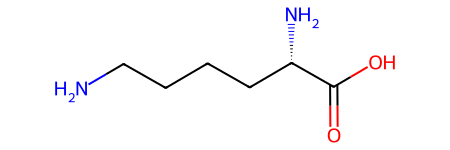

In [24]:
lysine = rdkit.Chem.MolFromSmiles("C(CCN)C[C@@H](C(=O)O)N")
lysine

<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

Use your smiles strings to create RDkit molecule objects (named: `ethyl_acetate`, `vanillin`, `amoxicillin`). Then, draw each structure in its own code cell.
- `ethyl_acetate_smiles`
- `vanillin_smiles`
- `amoxicillin_smiles`

You can look up the SMILES strings on <a href="https://pubchem.ncbi.nlm.nih.gov/">PubChem</a> or <a href="https://en.wikipedia.org/wiki/Main_Page">Wikipedia</a>
</div>

In [25]:
ethyl_acetate = rdkit.Chem.MolFromSmiles(ethyl_acetate_smiles)
vanillin = rdkit.Chem.MolFromSmiles(vanillin_smiles)
amoxicillin = rdkit.Chem.MolFromSmiles(amoxicillin_smiles)

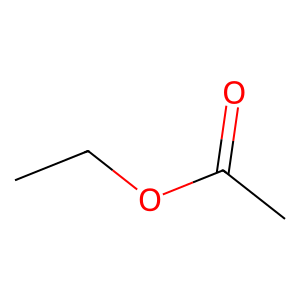

In [26]:
rdkit.Chem.Draw.MolToImage(ethyl_acetate)

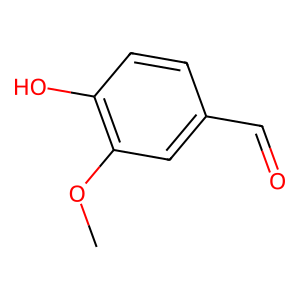

In [27]:
rdkit.Chem.Draw.MolToImage(vanillin)

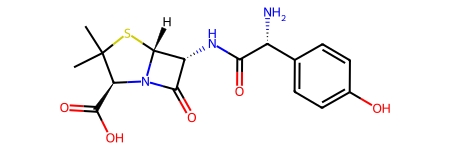

In [28]:
amoxicillin

## Working with RDKit Molecules

RDKit molecule objects have a number of methods we can use to get more information about the molecule.
In the next few cells, we'll look at some methods that can tell us some things about the molecules we've created.

<div class="alert alert-block alert-success"> 
<strong>Jupyter Skills: The Tab Key</strong>

When working with Python objects in the Jupyter notebook, you can type a variable or object name to see the methods available on that object.

In the cell below, type `ethyl_acetate.` (include a (`.`) at the end), then press the `tab` key. 
A list of possible methods and attributes will come up.

Look through the methods until you find one that gives you the number of atoms in the molecule.

</div>

**NOTE:** Methods are functions so they require parentheses at the end.

```python
object.method()
```

In [29]:
# Pick a method that will determine the number of atom in ibuprofen.

ethyl_acetate.GetNumAtoms()

6

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Getting Help</strong>

Is this the number of atoms you expected for a acetic_acid molecule (including hydrogens)? 

We can use the `help()` function on the method you found in the previous step to find a method argument to figure out a method argument to get the number of atoms we expect.

</div>

In [30]:
help(ethyl_acetate.GetNumAtoms)

Help on method GetNumAtoms:

GetNumAtoms(...) method of rdkit.Chem.rdchem.Mol instance
    GetNumAtoms( (Mol)self [, (int)onlyHeavy=-1 [, (bool)onlyExplicit=True]]) -> int :
        Returns the number of atoms in the molecule.

          ARGUMENTS:
            - onlyExplicit: (optional) include only explicit atoms (atoms in the molecular graph)
                            defaults to 1.
          NOTE: the onlyHeavy argument is deprecated


        C++ signature :
            int GetNumAtoms(RDKit::ROMol [,int=-1 [,bool=True]])



<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

Use the **onlyExplicit** argument for the `GetNumAtoms()` function to determine the total number of atoms in acetic_acid (including hydrogens).
</div>

In [32]:
ethyl_acetate.GetNumAtoms(onlyExplicit=False)

14

## Molecular Descriptors

A molecular descriptor is a numerical value that represents some property of a molecule (molecular weight, hydrogen bond donors/acceptors, polar surface area, ect...)

RDKit supports the calculation of many molecular descriptors using the `rdMolDescriptors` module. You can see a [full list of RDKit descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors) or [see the module documentation](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html).

We previously imported the `rdMolDescriptors` module so we can calculate our descriptors like this:

```python
rdMolDescriptors.descriptor_method_name(molecule_name)

```

For example, we can calculate the molecular weight of our ibuprofen molecule like this:

In [ ]:
ibuprofen_mw = rdMolDescriptors.CalcExactMolWt(ibuprofen)
print(ibuprofen_mw)

206.130679816


Here are some examples of other descriptors that RDkit can calculate.
____

`rdMolDescriptors.CalcExactMolWt((Mol)mol[, (bool)onlyHeavy=False]) → float :`

returns the molecule’s exact molecular weight

`rdMolDescriptors.CalcNumAtoms((Mol)mol) → int :`

returns the total number of atoms for a molecule

`rdMolDescriptors.CalcFractionCSP3((Mol)mol) → float :`

returns the fraction of C atoms that are SP3 hybridized

`rdMolDescriptors.CalcMolFormula((Mol)mol) → str :`

returns the molecule’s formula

`rdMolDescriptors.CalcNumAliphaticCarbocycles((Mol)mol) → int :`

returns the number of aliphatic (containing at least one non-aromatic bond) carbocycles for a molecule

`rdMolDescriptors.CalcNumAliphaticHeterocycles((Mol)mol) → int :`

returns the number of aliphatic (containing at least one non-aromatic bond) heterocycles for a molecule

`rdMolDescriptors.CalcNumAromaticRings((Mol)mol) → int :`

returns the number of aromatic rings for a molecule

`rdMolDescriptors.CalcNumAtomStereoCenters((Mol)mol) → int :`

Returns the total number of atomic stereocenters (specified and unspecified)

`rdMolDescriptors.CalcNumHBA((Mol)mol) → int :`

returns the number of H-bond acceptors for a molecule

`rdMolDescriptors.CalcNumHBD((Mol)mol) → int :`

returns the number of H-bond donors for a molecule
```

<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

Uses methods from the `rdMolDescritors` module to calculate 3 properties for amoxicillin.

Print all three properties.

</div>

In [38]:
MW = rdMolDescriptors.CalcExactMolWt(amoxicillin)
HBD = rdMolDescriptors.CalcNumHBD(amoxicillin)
HBA = rdMolDescriptors.CalcNumHBA(amoxicillin)
ALOGP = rdMolDescriptors.CalcCrippenDescriptors(amoxicillin)[0]
print(f'Amoxicillin MW: {MW}, HBD: {HBD}, HBA: {HBA}, ALogP: {ALOGP}')

Amoxicillin MW: 365.104541708, HBD: 4, HBA: 6, ALogP: 0.02370000000000072


# Iterator module

Can include if we have enough time

<div class="alert alert-block alert-success"> 
<strong>Python Skills: Iterators</strong>

When we look at the results of the `GetAtoms` method, it tells us that we have a `GetAtomsIterator`.
In Python, an iterator is an object that contains values that can be looped through and indexed in.

Although we haven't used this terminology before, a Python list is an example of an iterator.

</div>

Like a list, we can also call `len` on the iterator.

In [ ]:
len(acetic_acid_atoms)

4

Because `acetic_acid_atoms` is an iterator, we can use indexing to get a particular atom.
Atoms in RDKit molecules are represented by Atom objects.

In [ ]:
atom = acetic_acid_atoms[0]
atom

When we examine one atom, we see there that there are many methods associated with the atom. 
For example, we can print the atom element or atom hybridization.

In [ ]:
print(atom.GetSymbol())
print(atom.GetHybridization())

O
SP2


We can use a for loop to give information about each atom.

In [ ]:
for atom in acetic_acid_atoms:
    print(f"Atom {atom.GetSymbol()} has hybridization {atom.GetHybridization()}")

Atom C has hybridization SP3
Atom C has hybridization SP2
Atom O has hybridization SP2
Atom O has hybridization SP2


Bonds are also objects in RDKit, and we can iterate over them the same way we can iterate over atoms.

In [ ]:
acetic_acid_bonds = acetic_acid.GetBonds()
bond = acetic_acid_bonds[0]
bond.GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

<div class="alert alert-block alert-warning"> 
<h3>Challenge</h3>

Use a `for` loop to print information about each bond.
For each bond, you should print the starting atom symbol, the ending atom symbol,
and the bond type. 

Your output should look like the following:

```
Bond between C and C is a SINGLE bond.
Bond between C and O is a DOUBLE bond.
Bond between C and O is a SINGLE bond.
```

</div>

In [ ]:
for bond in acetic_acid_bonds:
    atom1 = bond.GetBeginAtom().GetSymbol()
    atom2 = bond.GetEndAtom().GetSymbol()
    print(f"Bond between {atom1} and {atom2} is a {bond.GetBondType()} bond.")